In [3]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [4]:
data=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 21s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
(xtrain,ytrain),(xtest,ytest)=data

In [6]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
xtrain.shape

(60000, 28, 28)

In [10]:
xtest.shape

(10000, 28, 28)

In [11]:
ytrain.shape

(60000,)

In [12]:
ytest.shape

(10000,)

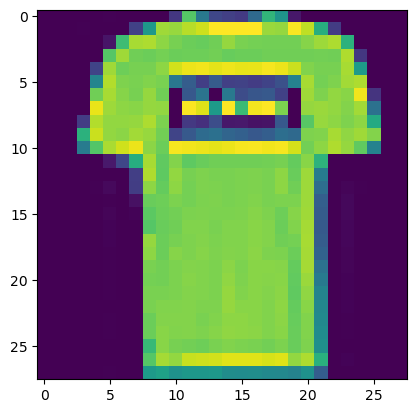

In [18]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1])

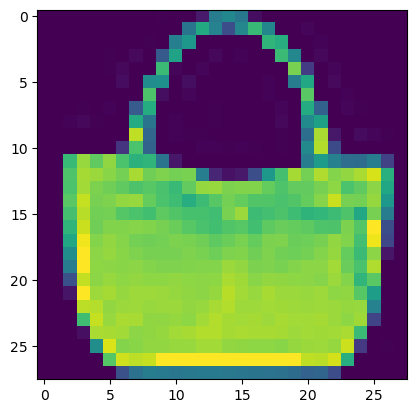

In [19]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[100])

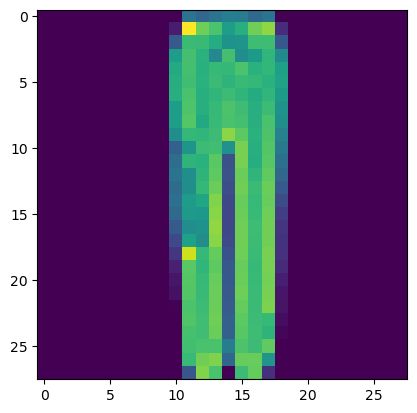

In [20]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1000])

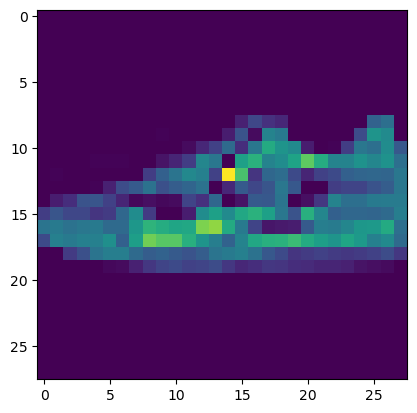

In [21]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[10001])

### Model building

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy   #this fn calculates the loss by comparing the predicted probabilities

In [27]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=600,activation='relu'))
model.add(Dense(units=300,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=10,activation='sigmoid'))

In [28]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
#SparseCategoricalCrossentropy used to catch the loss happening .


In [29]:
performance=model.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7294 - loss: 3.2620 - val_accuracy: 0.8248 - val_loss: 0.5056
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8348 - loss: 0.4636 - val_accuracy: 0.8375 - val_loss: 0.4651
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8470 - loss: 0.4275 - val_accuracy: 0.8426 - val_loss: 0.4405
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8574 - loss: 0.3902 - val_accuracy: 0.8231 - val_loss: 0.5563
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8653 - loss: 0.3781 - val_accuracy: 0.8350 - val_loss: 0.4562


In [31]:
performance.history

{'accuracy': [0.788183331489563,
  0.835016667842865,
  0.8485333323478699,
  0.8586000204086304,
  0.8666666746139526],
 'loss': [1.1190930604934692,
  0.46046745777130127,
  0.41990673542022705,
  0.3911440968513489,
  0.3740631639957428],
 'val_accuracy': [0.8248000144958496,
  0.8374999761581421,
  0.8425999879837036,
  0.8230999708175659,
  0.8349999785423279],
 'val_loss': [0.5055872797966003,
  0.4651065468788147,
  0.4405345320701599,
  0.5563399791717529,
  0.4562152326107025]}

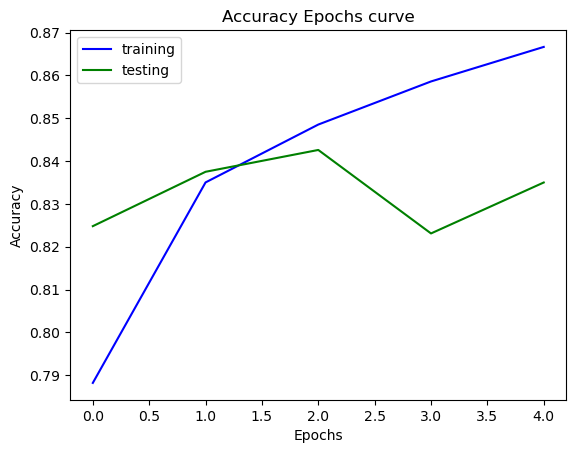

In [35]:
plt.plot(performance.history['accuracy'],color='b',label='training')
plt.plot(performance.history['val_accuracy'],color='g',label='testing')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Epochs curve')

plt.show()